<img src="https://idp.bits-pilani.ac.in/idp/login_files/logo.gif">


<h1><center> ML Webinar - 2 - Titanic: Machine Learning from Disaster </center></h1>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The dataset is taken from most famous [Kaggle](https://www.kaggle.com/c/titanic/overview) competition. The data dictionary looks like:

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning and preparation
- Model building
- Model evaluation


# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

**Use pandas to read titanic_data.csv as a dataframe.**

In [95]:
df = pd.read_csv("titanic_data.csv")

**Check out the info(), head(), and describe() methods on dataset.**

In [96]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a heatmap on dataset to visualize null values**


In [99]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

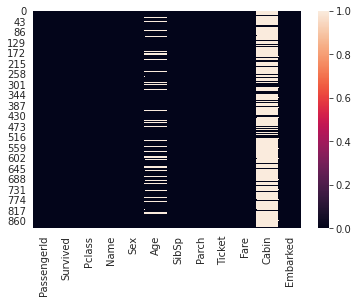

In [100]:
sns.heatmap(df.isnull())

**Check Survival Rate**

In [101]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

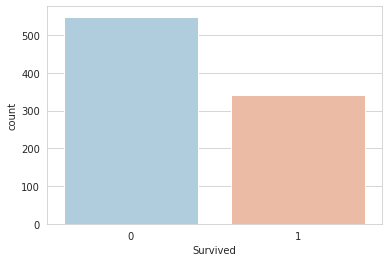

In [102]:
sns.set_style("whitegrid")
sns.countplot(df.Survived, palette="RdBu_r")

**Check survival rate for Male & Female individually.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

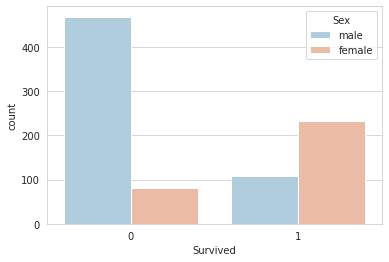

In [103]:
sns.set_style("whitegrid")
sns.countplot(df.Survived, hue=df.Sex, palette="RdBu_r")

**Check survival rate for each passenger class.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

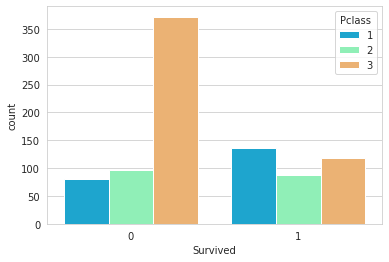

In [104]:
sns.set_style("whitegrid")
sns.countplot(df.Survived, hue=df.Pclass, palette="rainbow")

**Check age distribution for all the passengers on titanic**

<AxesSubplot:xlabel='Age'>

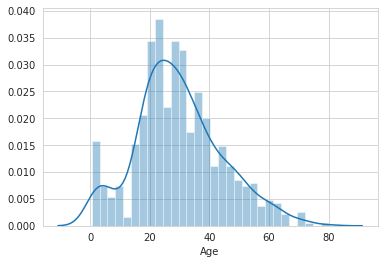

In [105]:
sns.distplot(df.Age.dropna(),bins=30)

**Check Fare distribution for all the passengers on titanic**

<AxesSubplot:xlabel='Fare'>

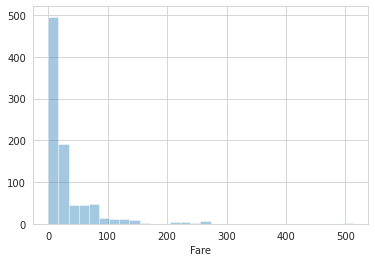

In [106]:
sns.distplot(df.Fare,kde=False,bins=30)

**Check for ourliers in age**

<AxesSubplot:xlabel='Age'>

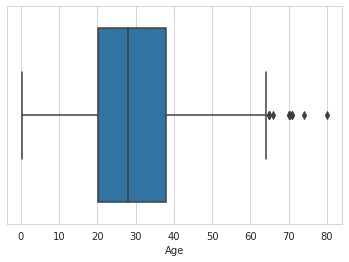

In [107]:
sns.boxplot(df.Age)

**Check for ourliers in age**

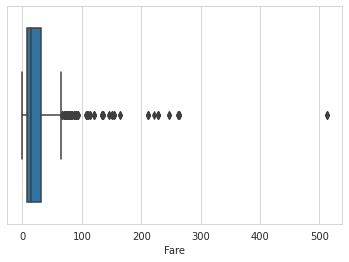

In [108]:
sns.boxplot(df.Fare)
plt.show()

# Data Cleaning

Missing Value Treatment
- Remove them (Data Loss)
- Impute them (Data Biasness)

In [109]:
df.groupby("Pclass")["Age"].mean().round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [110]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 30
        
        else:
            return 25
        
    else:
        return Age

In [111]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

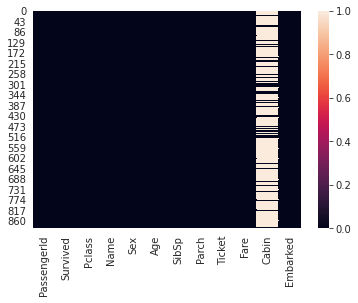

In [112]:
sns.heatmap(df.isnull())

In [113]:
df.drop("Cabin",1,inplace=True)

<AxesSubplot:>

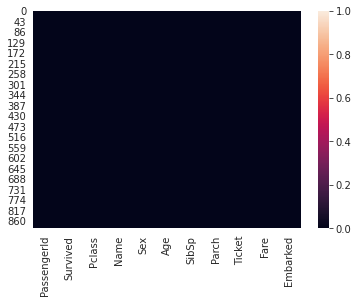

In [114]:
sns.heatmap(df.isnull())

In [115]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [116]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [117]:
df.Embarked = df.Embarked.fillna("S")

In [118]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Outlier Treatment

### Inter Quantile Range

- IQR = Q3-Q1
- lower = Q1 - 1.5 IQR
- upper = Q3 + 1.5*IQR

In [119]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Categorical Features

Notice that the **Sex** & **Embarked** columns are categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 2 element containing these column names.**

In [120]:
cat_feats = ['Sex','Embarked']

**Now use pd.get_dummies() to create a fixed larger dataframe that has new feature columns with dummy variables.**

In [121]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [122]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


In [123]:
final_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


**Drop unneccesary columns**

In [124]:
final_data.drop(["PassengerId","Name","Ticket"],1,inplace=True)

**Check for multi-collinearity**

<AxesSubplot:>

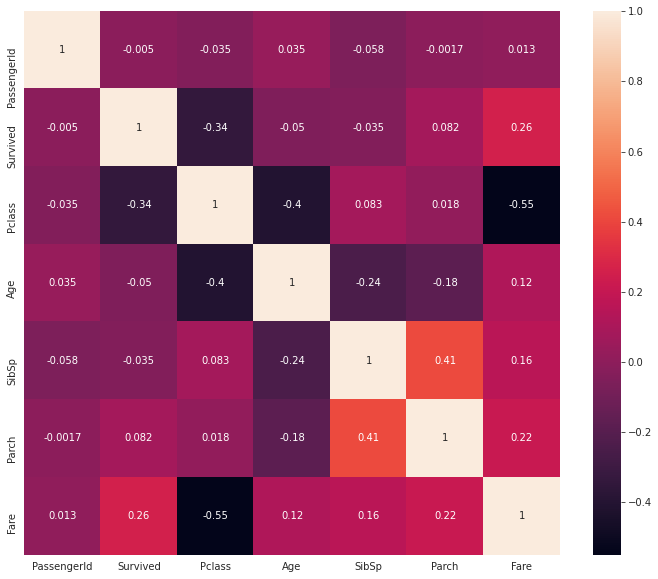

In [125]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

## Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [126]:
from sklearn.model_selection import train_test_split

X = final_data.drop('Survived',axis=1)
y = final_data['Survived']


# stratify=y suggests a stratified split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.30, random_state=101, stratify=y)

In [127]:
y_train.value_counts(normalize=True)

0    0.616372
1    0.383628
Name: Survived, dtype: float64

In [128]:
y_test.value_counts(normalize=True)

0    0.615672
1    0.384328
Name: Survived, dtype: float64

# Model Building

- Using Logistics Regression as our base model

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # class_weight='balanced'

model.fit(X_train,y_train)

/home/murtuza/miniconda3/envs/idp3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [130]:
y_pred = model.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7574626865671642

[[143  22]
 [ 43  60]]

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       165
           1       0.73      0.58      0.65       103

    accuracy                           0.76       268
   macro avg       0.75      0.72      0.73       268
weighted avg       0.75      0.76      0.75       268



In [132]:
# Training Accuracy
model.score(X_train,y_train)

0.8298555377207063

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [134]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [135]:
# Training Accuracy
dtree.score(X_train,y_train)

0.9871589085072231

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [136]:
y_pred = dtree.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7686567164179104

[[145  20]
 [ 42  61]]

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       165
           1       0.75      0.59      0.66       103

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.74       268
weighted avg       0.77      0.77      0.76       268



We can notice overfitting of our model.

# Tree Visualization

In [36]:
from sklearn import tree

decision_tree = tree.export_graphviz(dtree,
                                     out_file='tree.dot',
                                     feature_names=X_train.columns,
                                     filled=True)

In [37]:
!dot -Tpng tree.dot -o tree.png

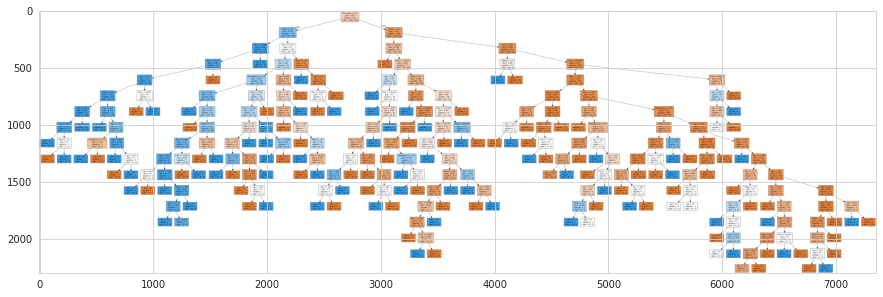

In [38]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

# Pruning

In [56]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [57]:
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,max_depth,train_acc,valid_acc
0,1,0.804173,0.746269
1,2,0.804173,0.746269
2,3,0.829856,0.764925
3,4,0.863563,0.791045
4,5,0.865169,0.791045
5,6,0.881220,0.798507
6,7,0.897271,0.805970
7,8,0.913323,0.791045
8,9,0.935795,0.776119
9,10,0.955056,0.776119


No handles with labels found to put in legend.


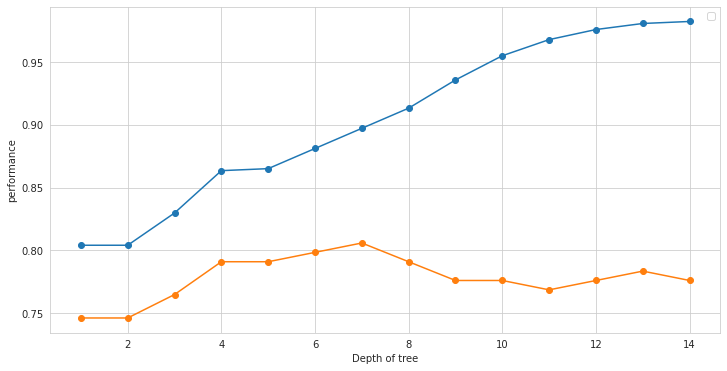

In [58]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [42]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [52]:
# Training Accuracy
dtree.score(X_train,y_train)

0.8635634028892456

In [53]:
# Test Accuracy
dtree.score(X_test,y_test)

0.7910447761194029

In [45]:
y_pred = dtree.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7910447761194029

[[144  21]
 [ 35  68]]

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       165
           1       0.76      0.66      0.71       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [47]:
from sklearn import tree

decision_tree = tree.export_graphviz(dtree,
                                     out_file='tree.dot',
                                     feature_names=X_train.columns,
                                     filled=True)

In [48]:
!dot -Tpng tree.dot -o tree.png

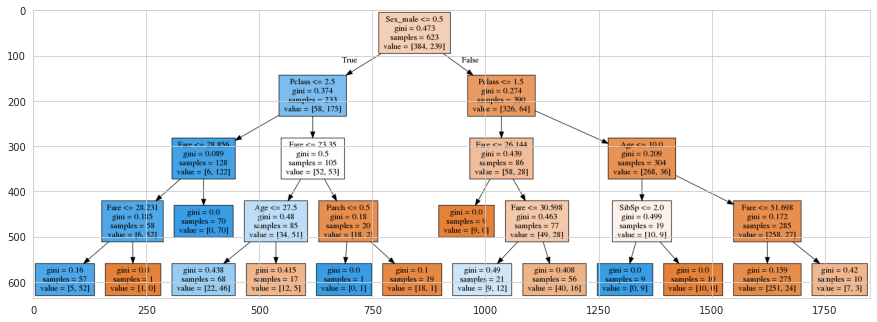

In [49]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

############################################ THE END ################################################